# Customer Data Aanlysis

### -- Analysis and Modeling a credit card customer dataset to gain business insights.

## Table of Content.

- Notebook I: Data Cleaning and first stage EDA.


- Notebook II: Churn Prediction.
         
         
- Notebook III: Customer Segementation.


- Notebook IV: Custermer Lifetime Value Analysis.

# This is Notebook III : Customer Segmentation.

0. Data Loading.     
    
     
1. Preprocessing and PCA.


2. K-Mean Clustering. 

    
3. Insights via Visualization and Inference.

In [184]:
# This is Python 3 environment, with Anaconda distribution of several helpful standard libraries.
# Additional modules/packages may needed: pickle.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

import pickle


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## 0. Data Loading.

In [185]:
# grab data from the pickle file
with open('1_data_after_notebook1.pkl', 'rb') as pickle_file:
    df = pickle.load(pickle_file)

In [186]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Divorced,Married,Single,Unknown,ClientNum_Cluster
0,0,45,0,3,1.000000,3.0,1,39,5,1,...,1.335,1144,42,1.625,0.061,0,1,0,0,1
1,0,49,1,5,3.000000,1.0,1,44,6,1,...,1.541,1291,33,3.714,0.105,0,0,1,0,1
2,0,51,0,3,3.000000,4.0,1,36,4,1,...,2.594,1887,20,2.333,0.000,0,1,0,0,0
3,0,40,1,4,1.000000,1.0,1,34,3,4,...,1.405,1171,20,2.333,0.760,0,0,0,1,1
4,0,40,0,3,0.000000,3.0,1,21,5,1,...,2.175,816,28,2.500,0.000,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,3.000000,2.0,1,40,3,2,...,0.703,15476,117,0.857,0.462,0,0,1,0,1
10123,1,41,0,2,2.061106,2.0,1,25,4,2,...,0.804,8764,69,0.683,0.511,1,0,0,0,0
10124,1,44,1,1,1.000000,1.0,1,36,5,3,...,0.819,10291,60,0.818,0.000,0,1,0,0,0
10125,1,30,0,2,3.000000,2.0,1,36,4,3,...,0.535,8395,62,0.722,0.000,0,0,0,1,0


## 1. Data Preprocessing and PCA.

Principal Components Analysis (PCA) is an important Dimension Reduction technique in Machine Learning.

PCA often precedes the unsupervised learning method K-Mean Clustering. 

Because PCA identifies the most influential (eigen-)directions/components in our high dimension data space, and using only the most influential directions makes K-Mean Clustering much more effective and less likely to suffer from the curse of dimensionality.

#### The summary below shows that columns have very different scales.  It's crucial to scale/standarize the features for PCA and K-Mean.

In [187]:
# first double check df dtypes and null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  float64
 5   Income_Category           10127 non-null  float64
 6   Card_Category             10127 non-null  int64  
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [188]:
# check column statistics
df.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Divorced,Married,Single,Unknown,ClientNum_Cluster
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,0.529081,2.346203,2.061106,2.305322,1.083638,35.928409,3.812580,2.341167,...,0.759941,4404.086304,64.858695,0.712222,0.274894,0.073862,0.462822,0.389355,0.073961,0.328330
std,0.367235,8.016814,0.499178,1.298908,1.302539,1.284294,0.333784,7.986416,1.554408,1.010622,...,0.219207,3397.129254,23.472570,0.238086,0.275691,0.261559,0.498641,0.487628,0.261720,0.469629
min,0.000000,26.000000,0.000000,0.000000,0.000000,1.000000,1.000000,13.000000,1.000000,0.000000,...,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,1.000000,1.000000,1.000000,1.000000,31.000000,3.000000,2.000000,...,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,46.000000,1.000000,2.000000,2.061106,2.000000,1.000000,36.000000,4.000000,2.000000,...,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,52.000000,1.000000,3.000000,3.000000,3.000000,1.000000,40.000000,5.000000,3.000000,...,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,73.000000,1.000000,5.000000,5.000000,5.000000,4.000000,56.000000,6.000000,6.000000,...,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000,1.000000,1.000000,1.000000,1.000000


### Define a function to perform PCA and output explained variance plot.

In [189]:
def Perform_PCA(df, n_components = 1):
    """
    INPUT:

    df : a pd.dataframe, data for PCA
    n_component: an integer, defines the number of component in PCA
    
    OUTPUT:
    
    Return a tuple (df_components, pca), where
    df_components: a dataframe saving the components of the PCA
    pca: a sklearn PCA instance
    
    Also plot the explained variance and print the total explained variance.
    
    """
    # Standardize the data
    df_standard = StandardScaler().fit_transform(df)
    
    # instantiate PCA and fit_transform
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(df_standard)

    # Plot the explained variance of the components
    plt.bar(range(n_components), pca.explained_variance_ratio_)
    plt.xlabel('Component')
    plt.xticks(range(n_components))
    plt.ylabel('Explained Variance')
    plt.title(f'PCA Explained Variance, n_components={n_components}')
    plt.show()
    
    print(f'The total explained variance by the {n_components} components is {sum(pca.explained_variance_ratio_)}')
    
    # Save components to a DataFrame
    df_components = pd.DataFrame(components)
    
    return df_components, pca

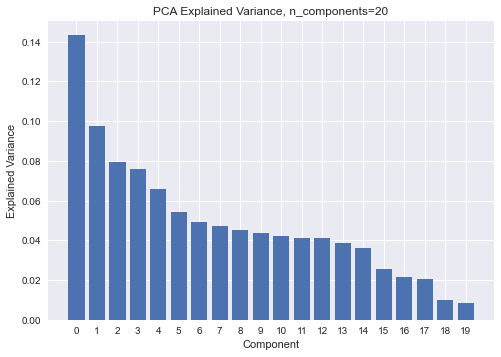

The total explained variance by the 20 components is 0.9860341074805674


In [190]:
# perform PCA to df with 20 components

df_pca, _ = Perform_PCA(df, 20)

## 2. K-Mean Clustering

In this section, we use the unsupervised learning method K-Mean to detect if there is any clustering patterns in our customer data.

The first thing is to determine the number of clusters.

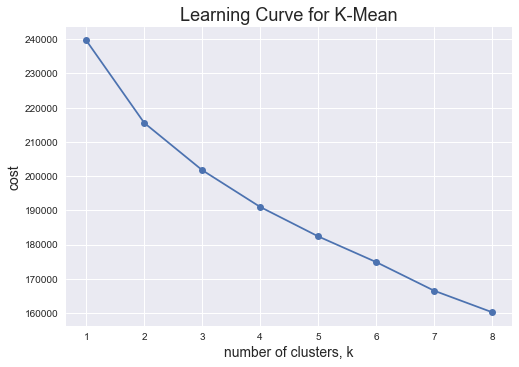

In [191]:
# range of k-value to tune
ks = range(1, 9)
# list to store the cost for each k-value
costs = []
# list to store the model for each k-value
km_models = []


for k in ks:
    model = KMeans(n_clusters=k)

    model.fit(df_pca)

    # Append the inertia to the list of inertias
    costs.append(model.inertia_)
    km_models.append(model)
        
plt.plot(ks, costs, '-o')
plt.xlabel('number of clusters, k', fontsize =14)
plt.ylabel('cost', fontsize = 14)
plt.title('Learning Curve for K-Mean', fontsize=18)
plt.xticks(ks)

plt.show()

### k=2 seems to be the choice, but it is not completely clear from just the learning curve about. 

The lack of sharp 'Elbow' suggests that we may reduce the number of components use in training of our K-Mean Model.

### So, we shall tune two hyperparameters: number of components/columns (in df_pca) and number of clusters k.

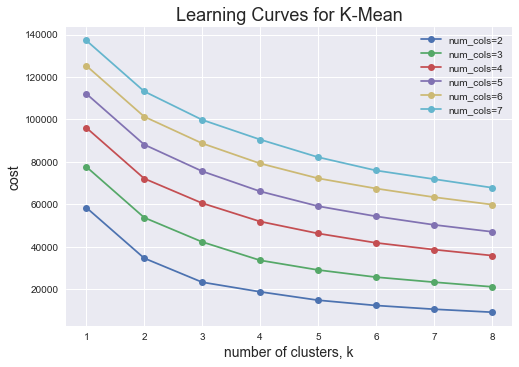

In [196]:
# define the number of columns in df_pca to use
num_cols = range(2, 8)
# define the range of k-values that we want test
ks = range(1, 9)
# initiate dict to store the cost for each k-value and num of columns
costs = {n: [] for n in num_cols}
# initiate dict to store the cost for each k-value and num of columns
models = {n: [] for n in num_cols}

# n is the number of components to use in training
for n in num_cols:
    # k is the number of clusters
    for k in ks:
        model = KMeans(n_clusters=k)

        model.fit(df_pca.iloc[:,:n])

        # Append the cost to the dictionary costs
        costs[n].append(model.inertia_)
        # Cache the model in the dictionary models for later use
        models[n].append(model)
    # plot the learning curve with the current num of cols n    
    plt.plot(ks, costs[n], '-o', label = f'num_cols={n}')

        

plt.xlabel('number of clusters, k', fontsize =14)
plt.ylabel('cost', fontsize = 14)
plt.title('Learning Curves for K-Mean', fontsize=18)
plt.xticks(ks)
plt.legend()

plt.show()

From these learning curves, we can conclude that:

### The best k value is likely to be 2 or 3.

# 3. Insights via Visualization and Inference

In [206]:
# number of principal components for training
n = 6

# K-mean model with k=2 train on 2 principal components
model_2 = models[n][1]
# K-mean model with k=3 train on 2 principal components
model_3 = models[n][2]

# label customers: which k=2 cluster they belong
df['cluster_k=2'] = model_2.predict(df_pca.iloc[:,:n])
# label customers: which k=3 cluster they belong
df['cluster_k=3'] = model_3.predict(df_pca.iloc[:,:n])

df_pca['cluster_k=2'] = model_2.predict(df_pca.iloc[:,:n])
df_pca['cluster_k=3'] = model_3.predict(df_pca.iloc[:,:n])

## 3.1 Inferring the k=2 clusters


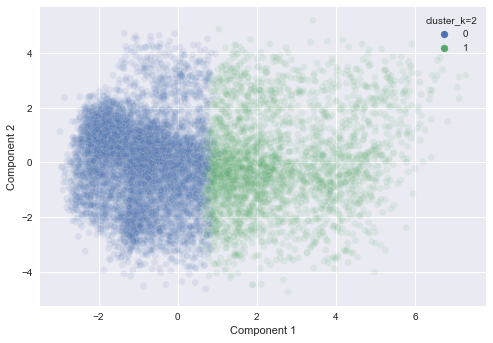

In [207]:
# scatter plot using Component 1 and Component 2

df_pca.columns = [str(x) for x in df_pca.columns]

sns.scatterplot(data= df_pca, x='0', y='1', hue='cluster_k=2', alpha=0.1)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

#### Observation: the two clusters are basically separated by component 1. 
#### This plot alone is not particularly enlightening.


## The following simple table, grouping df by cluster and applying mean(), tells a lot more!

In [216]:
compare_cluster_2 = df.groupby('cluster_k=2').mean().T
# Difference bwt 2 clusters
compare_cluster_2['Rel_Diff'] = (compare_cluster_2[1] - compare_cluster_2[0])/(compare_cluster_2[1] + compare_cluster_2[0])

compare_cluster_2.style.bar(subset=['Rel_Diff'], align='mid', color=['#d65f5f', '#5fba7d'])

cluster_k=2,0,1,Rel_Diff
Attrition_Flag,0.163582,0.152933,-0.033645
Customer_Age,46.285656,46.432530,0.001584
Gender,0.689984,0.103634,-0.738831
Dependent_count,2.290419,2.493703,0.042491
Education_Level,2.067250,2.044859,-0.005445
Income_Category,1.801034,3.638719,0.337825
Card_Category,1.009254,1.280317,0.118390
Months_on_book,35.865950,36.093559,0.003163
Total_Relationship_Count,3.902014,3.576107,-0.043581
Months_Inactive_12_mon,2.352477,2.311263,-0.008837




## There are several significant differences: 

1. Credit Limit: cluster_1  = 20393, cluster_0 = 4184.

2. Avg_Open_to_Buy: cluster_1 = 19280, cluster_0 = 3002.

3. Total_Trans_Amt: cluster_1 = 5528, cluster_0 = 3979.

4. Income_Category: cluster_1 = 3.6, cluster_0 = 1.8 (** Larger number represents higher income.)

5. Gender: cluster_1 = 0.10, cluster_0 = 0.69.  (** We set Female = 1, Male = 0.)

6. Avg_Utilization_Ratio: cluster_1 = 0.066, cluster_0 = 0.354.


# Insight 1: 

### Customers in Cluster_1 have:

### -- significant higher Income, Credit Limits, Buying Capacity, Total Transaction Amounts

### -- lower Utilization Ratio, and is

### -- more likely to be male.


## In other words, the K-mean model learned the customers' financial status and group them based on that. It also indicates a financial inequality between different genders.


## 3.2 Visualizing k=3 Cluster and More Insights.

#### So, what about the k=3 cluster?

In [219]:
compare_cluster_3 = df.groupby('cluster_k=3').mean().T

# Difference bwt cluster 0 and 2
compare_cluster_3['Rel_Diff_btw_0_&_2'] = (compare_cluster_3[2] - compare_cluster_3[0])/(compare_cluster_3[2] + compare_cluster_3[0])

compare_cluster_3.style.bar(subset=['Rel_Diff_btw_0_&_2'], align='mid', color=['#d65f5f', '#5fba7d'])

cluster_k=3,0,1,2,Rel_Diff_btw_0_&_2
Attrition_Flag,0.176544,0.141780,0.154714,-0.065899
Customer_Age,45.728586,46.385775,46.895687,0.012600
Gender,0.683516,0.093735,0.605316,-0.060675
Dependent_count,2.270418,2.531324,2.323972,0.011656
Education_Level,2.061664,2.020573,2.082122,0.004937
Income_Category,1.814741,3.724447,2.043882,0.059384
Card_Category,1.018426,1.346208,1.009529,-0.004388
Months_on_book,35.405876,36.072068,36.378134,0.013544
Total_Relationship_Count,3.845618,3.492699,3.949599,0.013339
Months_Inactive_12_mon,2.374253,2.305699,2.326730,-0.010109


### Compare this dataframe to the previous one, we see that:

  #### 1. Cluster_1 here is basically the same as Cluster_1 in the k=2 model, which singles out customers that enjoy better financial status.

  #### 2. Cluster_0 in k=2 model seems to be divided into Cluster_0 and Cluster_2 here. 

3. They are basically separated by Marital Status: Cluster_0 is Single or Divorced, Cluster_2 is Married.

4. Cluster_2 (married customers) has a somewhat lower Totat-Transaction-Amount than Cluster_0 (single customers).

# Insight 2: "Getting Married Saves you Money" ! ( ** Not as serious as insight 1 though.)

## The relations between the clusters here and the clusters in the k=2 model 

## are better illustrated by the following plots.

<AxesSubplot:xlabel='0', ylabel='1'>

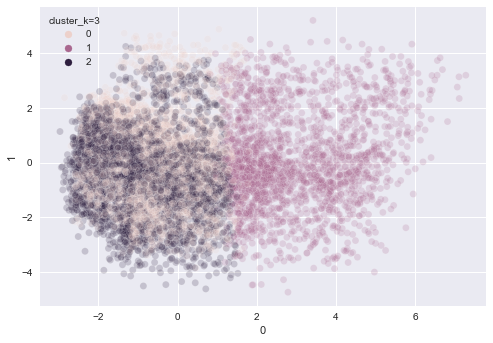

In [208]:
sns.scatterplot(data= df_pca, x='0', y='1', hue='cluster_k=3', alpha=0.2)

<AxesSubplot:xlabel='1', ylabel='2'>

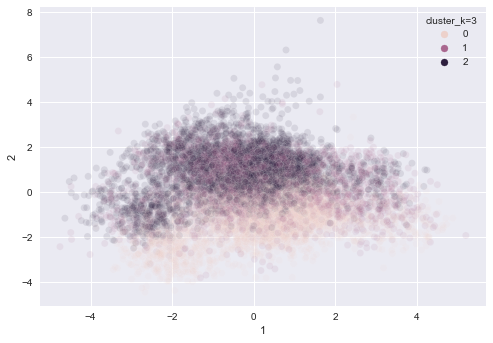

In [209]:
sns.scatterplot(data= df_pca, x='1', y='2', hue='cluster_k=3', alpha=0.1)